###       Sarcasm Detection Using Positional Encoding, Self_Attention and Multi-Head Attention

## Project Overview :
    
    This project aims to develop a deep leaning model for detecting the Sarcasm in a given sentences. The model is built using Transformer-Encoder Block, which are well suited for the detecting the Sarcasm tasks. The project includes the following steps:

1. Data Collection: We use the text of Sarcasm_Detection_Dataset_v2.json  dataset. This dataset has rich complex text provides a good challenge for out mode.

2. Data Preprocessing: The text data is tokenized, converted into sequences, and padded to ensure unifrom input lengths. The sequences are then split into training and testing set.

3. Model Building: An Transformer-Based Model is constructed with an

  -> MultiHeadAttention
  -> Positional Encoding
  -> LayerNormalization
  -> Feed-Forward Network

4. Model Training: The model is trained using the prepared sequences.

5. Model Evaluation: The model is evaluated using a set of example sentences to test its ability to detect whether the given sentence is sarcastic or not.



In [30]:
  # Tiny Transformer for Sarcasm Detection

# Import necessary libraries
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import seaborn as sns
import re

### Code Explanation: Imports

This cell is the starting point of the notebook and is responsible for importing all the necessary Python libraries and modules required for building and training the sarcasm detection models.

*   `import numpy as np`: Imports the NumPy library, which is fundamental for numerical operations in Python, especially for working with arrays and matrices. It's aliased as `np` for convenience.
*   `import pandas as pd`: Imports the pandas library, which is widely used for data manipulation and analysis. It provides DataFrames, a powerful data structure for handling structured data. It's aliased as `pd`.
*   `import tensorflow as tf`: Imports the core TensorFlow library, an open-source machine learning framework. It's aliased as `tf`.
*   `from tensorflow import keras`: Imports the Keras API, a high-level interface for building and training neural networks, which is now integrated into TensorFlow.
*   `from tensorflow.keras import layers`: Imports the `layers` module from Keras, which contains various types of neural network layers (e.g., Dense, Embedding, LSTM, MultiHeadAttention) that are used to construct the models.
*   `import matplotlib.pyplot as plt`: Imports the `pyplot` module from Matplotlib, a popular plotting library for creating static, interactive, and animated visualizations in Python. It's aliased as `plt`.
*   `import seaborn as sns`: Imports the Seaborn library, which is built on top of Matplotlib and provides a high-level interface for drawing attractive and informative statistical graphics. It's aliased as `sns`.
*   `import re`: Imports the regular expression module, which can be used for pattern matching and text manipulation (although it's not explicitly used in the subsequent code in this notebook, it's often useful in text processing tasks).

In [31]:
import pandas as pd

# Load the dataset from the correct path. The dataset is in JSON format with each line as a separate JSON object.
df = pd.read_json("/content/Sarcasm_Headlines_Dataset.json", lines=True)

# Display the first few rows of the dataset to understand its structure and content.
df.head()
# this data set is downloaded from kaggle

,article_link,headline,is_sarcastic
0,https://www.huffingtonpost.com/entry/versace-b...,former versace store clerk sues over secret 'b...,0
1,https://www.huffingtonpost.com/entry/roseanne-...,the 'roseanne' revival catches up to our thorn...,0
2,https://local.theonion.com/mom-starting-to-fea...,mom starting to fear son's web series closest ...,1
3,https://politics.theonion.com/boehner-just-wan...,"boehner just wants wife to listen, not come up...",1
4,https://www.huffingtonpost.com/entry/jk-rowlin...,j.k. rowling wishes snape happy birthday in th...,0


### Code Explanation: Load Dataset

This cell is responsible for loading the dataset containing headlines and their corresponding sarcasm labels.

*   `df = pd.read_json("/content/Sarcasm_Headlines_Dataset.json", lines=True)`: This line uses the pandas `read_json` function to load data from a JSON file located at `/content/Sarcasm_Headlines_Dataset.json`.
    *   The file is assumed to be in a format where each line is a separate JSON object, which is why `lines=True` is specified. This tells pandas to read the file line by line as individual JSON records.
    *   The loaded data is stored in a pandas DataFrame named `df`.
*   `df.head()`: This line displays the first 5 rows of the DataFrame `df`. This is a useful step to quickly inspect the structure of the data, the column names (`article_link`, `headline`, and `is_sarcastic`), and the format of the data within those columns. It helps in understanding what the dataset looks like before further processing.

In [32]:
# Data preprocessing:
# Extract the 'headline' column as the input text data (features).
texts = df['headline'].values
# Extract the 'is_sarcastic' column as the target variable (labels).
y = df['is_sarcastic'].values

### Code Explanation: Data Preprocessing - Extract Features and Labels

This cell prepares the data for the machine learning model by separating the input text (features) from the output label (target variable).

*   `texts = df['headline'].values`: This line selects the column named 'headline' from the DataFrame `df`. The `.values` attribute is then used to extract the data from this column as a NumPy array. This array, stored in the `texts` variable, contains all the headline strings and will serve as the input features for our models.
*   `y = df['is_sarcastic'].values`: Similarly, this line selects the 'is_sarcastic' column from the DataFrame. The `.values` attribute extracts the data as a NumPy array. This array, stored in the `y` variable, contains the corresponding labels (0 or 1) indicating whether each headline is sarcastic or not. This will be the target variable that the models will learn to predict.

In [33]:
# Tokenization: Convert text data into numerical sequences.
# Define the vocabulary size (maximum number of unique words to consider).
vocab_size = 10000
# Define the maximum length of each sequence. Headlines longer than this will be truncated, and shorter ones will be padded.
max_len = 40

# Initialize the TextVectorization layer.
# max_tokens: The maximum size of the vocabulary.
# output_mode='int': The layer will output sequences of integer indices representing words.
# output_sequence_length: The fixed length of output sequences.
vectorizer = layers.TextVectorization(max_tokens=vocab_size, output_mode='int', output_sequence_length=max_len)
# Adapt the vectorizer to the text data. This builds the vocabulary.
vectorizer.adapt(texts)
# Apply the vectorizer to the text data to convert text headlines into numerical sequences.
X = vectorizer(texts)

### Code Explanation: Tokenization and Sequencing

This cell performs the crucial step of converting the raw text data into a numerical format that can be understood and processed by the neural network models.

*   `vocab_size = 10000`: This variable sets the maximum number of unique words (tokens) that will be considered in the vocabulary. The `TextVectorization` layer will build a vocabulary of the most frequent `vocab_size` words from the input text. Words not in this vocabulary will be treated specially (usually as an "unknown" token).
*   `max_len = 40`: This variable defines the fixed length of the output sequences. Text headlines will be converted into sequences of integers. Headlines longer than `max_len` will be truncated (cut off), and headlines shorter than `max_len` will be padded with zeros at the end to reach this fixed length. This is necessary because neural networks typically require fixed-size inputs.
*   `vectorizer = layers.TextVectorization(max_tokens=vocab_size, output_mode='int', output_sequence_length=max_len)`: This line initializes a `TextVectorization` layer from Keras.
    *   `max_tokens=vocab_size`: Configures the layer to build a vocabulary of the specified size.
    *   `output_mode='int'`: Specifies that the output of the layer should be sequences of integer indices, where each integer corresponds to a word in the vocabulary.
    *   `output_sequence_length=max_len`: Ensures that all output sequences have the fixed length defined by `max_len`.
*   `vectorizer.adapt(texts)`: This is a crucial step where the `TextVectorization` layer learns the vocabulary from the input `texts` data. The layer analyzes the frequency of words in the `texts` array and builds a mapping from words to integer indices based on the `max_tokens` limit.
*   `X = vectorizer(texts)`: After the vectorizer has been adapted (learned the vocabulary), this line applies the vectorization process to the original `texts` data. Each headline string in `texts` is converted into a sequence of integers based on the learned vocabulary and padded or truncated to `max_len`. The resulting numerical sequences are stored in the variable `X`, which is a TensorFlow tensor and will be used as the input for the models.

In [34]:
# Train-test split: Divide the dataset into training and testing sets.
from sklearn.model_selection import train_test_split

# Split the data: 80% for training, 20% for testing.
# random_state for reproducibility.
X_train, X_test, y_train, y_test = train_test_split(X.numpy(), y, test_size=0.2, random_state=42)

### Code Explanation: Train-Test Split

This cell divides the preprocessed numerical data (`X`) and the corresponding labels (`y`) into two distinct sets: a training set and a testing set. This is a fundamental step in machine learning to train the model on one portion of the data and evaluate its performance on a separate, unseen portion.

*   `from sklearn.model_selection import train_test_split`: This line imports the `train_test_split` function from the `sklearn.model_selection` module in the scikit-learn library. This function is a convenient way to split arrays or matrices into random train and test subsets.
*   `X_train, X_test, y_train, y_test = train_test_split(X.numpy(), y, test_size=0.2, random_state=42)`: This line performs the actual data splitting.
    *   `X.numpy()`: The `train_test_split` function from scikit-learn typically works with NumPy arrays. Since `X` is a TensorFlow tensor, `.numpy()` is used to convert it to a NumPy array. This array contains the numerical sequences of the headlines.
    *   `y`: This is the NumPy array containing the corresponding labels for each headline.
    *   `test_size=0.2`: This parameter specifies the proportion of the dataset that should be allocated to the test set. In this case, 0.2 means 20% of the data will be used for testing, and the remaining 80% will be used for training.
    *   `random_state=42`: This parameter is used to seed the random number generator. By setting a specific `random_state`, you ensure that the data split is the same every time you run the code. This is important for reproducibility, allowing you to get the same training and test sets consistently.
*   The function returns four variables:
    *   `X_train`: The features (numerical sequences) for the training set.
    *   `X_test`: The features for the testing set.
    *   `y_train`: The labels for the training set.
    *   `y_test`: The labels for the testing set.

In [35]:
# Define the positional encoding function for the Transformer model.
# Positional encoding adds information about the position of words in a sequence,
# which is crucial for Transformers as they don't have inherent sequence processing like RNNs.
def positional_encoding(length, depth):
    # Ensure depth is even for pairing sin and cos waves
    depth = depth / 2
    # Create a range of positions (0, 1, 2, ..., length-1)
    positions = np.arange(length)[:, np.newaxis]  # (seq, 1)
    # Create a range of depths (0, 1, 2, ..., depth-1)
    depths = np.arange(depth)[np.newaxis, :] / depth  # (1, depth)
    # Calculate the rates for sinusoidal waves
    angle_rates = 1 / (10000**depths)
    # Calculate the angles for each position and depth
    angle_rads = positions * angle_rates
    # Interleave sin and cos waves
    pos_encoding = np.concatenate(
        [np.sin(angle_rads), np.cos(angle_rads)], axis=-1)
    # Cast the result to tf.float32
    return tf.cast(pos_encoding, dtype=tf.float32)

### Code Explanation: Positional Encoding Function

This cell defines a function that generates positional encodings, a critical component for Transformer models. Since Transformers process input sequences in parallel (unlike LSTMs which process sequentially), they need an additional mechanism to understand the order or position of tokens in the sequence. Positional encoding provides this information.

*   `def positional_encoding(length, depth):`: Defines a function named `positional_encoding` that takes two arguments:
    *   `length`: The maximum length of the input sequences (e.g., `max_len`).
    *   `depth`: The dimensionality of the embedding or the model's internal representation (e.g., `embed_dim`).
*   `depth = depth / 2`: The positional encoding uses pairs of sine and cosine functions. To ensure that the total depth of the encoding matches the embedding depth, the input `depth` is halved for the individual sine and cosine components.
*   `positions = np.arange(length)[:, np.newaxis]`: Creates a NumPy array representing the positions in the sequence, ranging from 0 to `length - 1`. `[:, np.newaxis]` reshapes it into a column vector of shape `(length, 1)`.
*   `depths = np.arange(depth)[np.newaxis, :] / depth`: Creates a NumPy array representing the different depths (dimensions) of the encoding, ranging from 0 to `depth - 1`, normalized by `depth`. `[np.newaxis, :]` reshapes it into a row vector of shape `(1, depth)`.
*   `angle_rates = 1 / (10000**depths)`: This calculates the rates at which the sinusoidal waves oscillate. The formula `1 / (10000**(i / depth))` where `i` is the depth dimension, means that different dimensions of the positional encoding correspond to different wavelengths. Lower dimensions have longer wavelengths, and higher dimensions have shorter wavelengths. This allows the model to easily attend to relative positions.
*   `angle_rads = positions * angle_rates`: This calculates the angles (in radians) for the sine and cosine functions at each position and for each depth dimension. The resulting shape is `(length, depth)`.
*   `pos_encoding = np.concatenate([np.sin(angle_rads), np.cos(angle_rads)], axis=-1)`: This is where the actual positional encoding is generated. It concatenates the sine of the angles and the cosine of the angles along the last axis (`axis=-1`). This creates a positional vector of shape `(length, 2 * depth)` for each position in the sequence. Since `depth` was halved earlier, the final shape is `(length, original_depth)`, matching the embedding dimension.
*   `return tf.cast(pos_encoding, dtype=tf.float32)`: Finally, the generated positional encoding NumPy array is converted into a TensorFlow tensor with a data type of `tf.float32` and returned.

In [36]:
# Define the Transformer encoder block.
# This block is a core component of the Transformer model, responsible for processing input sequences.
def transformer_encoder(inputs, head_size, num_heads, ff_dim, dropout=0):
    # Self-attention mechanism: Allows the model to weigh the importance of different words in the input sequence.
    # key_dim: The dimensionality of the key and query vectors.
    # num_heads: The number of attention heads. Multiple heads allow the model to attend to different parts of the sequence simultaneously.
    attention = layers.MultiHeadAttention(key_dim=head_size, num_heads=num_heads, dropout=dropout)(inputs, inputs)
    # Dropout for regularization.
    attention = layers.Dropout(dropout)(attention)
    # Add residual connection and apply layer normalization.
    attention = layers.LayerNormalization(epsilon=1e-6)(inputs + attention)

    # Feed-forward network: A simple two-layer fully connected network applied to each position independently.
    ff = layers.Dense(ff_dim, activation="relu")(attention)
    ff = layers.Dense(inputs.shape[-1])(ff)
    # Dropout for regularization.
    ff = layers.Dropout(dropout)(ff)
    # Add residual connection and apply layer normalization.
    return layers.LayerNormalization(epsilon=1e-6)(attention + ff)

### Code Explanation: Transformer Encoder Block

This cell defines the `transformer_encoder` function, which represents a single block of the Transformer encoder. This block is the fundamental processing unit within the Transformer model, responsible for learning contextualized representations of the input sequence.

*   `def transformer_encoder(inputs, head_size, num_heads, ff_dim, dropout=0):`: Defines the function that takes the input tensor, the size of the attention heads, the number of attention heads, the dimensionality of the feed-forward network, and a dropout rate as arguments.
*   `attention = layers.MultiHeadAttention(key_dim=head_size, num_heads=num_heads, dropout=dropout)(inputs, inputs)`: This is the core **Multi-Head Self-Attention** mechanism.
    *   `layers.MultiHeadAttention`: This Keras layer implements the multi-head attention mechanism.
    *   `key_dim=head_size`: Sets the dimensionality of the key and query vectors within each attention head.
    *   `num_heads=num_heads`: Specifies the number of independent attention heads. Multiple heads allow the model to attend to different aspects of the input sequence simultaneously and capture diverse relationships.
    *   `dropout=dropout`: Applies dropout to the attention weights, a regularization technique to prevent overfitting.
    *   `(inputs, inputs)`: In self-attention, the Query, Key, and Value inputs are all derived from the same input tensor (`inputs`). This allows the model to weigh the importance of every other token in the sequence when processing a specific token.
*   `attention = layers.Dropout(dropout)(attention)`: Applies dropout to the output of the multi-head attention layer.
*   `attention = layers.LayerNormalization(epsilon=1e-6)(inputs + attention)`: This step performs two key operations:
    *   `inputs + attention`: This is a **Residual Connection**. It adds the original input tensor (`inputs`) to the output of the attention mechanism (`attention`). Residual connections help in training deep networks by allowing gradients to flow more easily through the network.
    *   `layers.LayerNormalization(epsilon=1e-6)`: Applies **Layer Normalization** to the sum of the input and attention output. Layer normalization normalizes the inputs across the features for each sample independently, which helps to stabilize the training process. `epsilon` is a small value added to the variance to prevent division by zero.
*   `ff = layers.Dense(ff_dim, activation="relu")(attention)`: This is the first layer of the **Feed-Forward Network** (also known as the Position-wise Feed-Forward Network). It's a dense layer that applies a linear transformation followed by a ReLU activation function. `ff_dim` is the number of units in this layer. This network is applied independently to each position in the sequence.
*   `ff = layers.Dense(inputs.shape[-1])(ff)`: This is the second layer of the Feed-Forward Network. It's a dense layer that projects the output back to the original dimensionality of the input tensor (`inputs.shape[-1]`).
*   `ff = layers.Dropout(dropout)(ff)`: Applies dropout to the output of the feed-forward network for regularization.
*   `return layers.LayerNormalization(epsilon=1e-6)(attention + ff)`: This is the final step of the encoder block. It again applies a **Residual Connection** (adding the output of the attention block `attention` to the output of the feed-forward network `ff`) and then applies **Layer Normalization** to the result. The output of this function is the processed tensor after passing through one Transformer encoder block.

In [37]:
# Build the Transformer model for sarcasm detection.

# Define model parameters.
embed_dim = 64  # Dimensionality of the word embeddings and the model's internal representation.
num_heads = 2   # Number of attention heads in the MultiHeadAttention layer.
ff_dim = 64     # Dimensionality of the feed-forward network in the Transformer block.

# Define the model's input layer. It expects sequences of integers with a fixed length (max_len).
inputs = keras.Input(shape=(max_len,))
# Add an embedding layer to convert integer indices into dense vectors of fixed size (embed_dim).
x = layers.Embedding(vocab_size, embed_dim)(inputs)
# Add positional encoding to the embeddings to provide information about word positions.
x += positional_encoding(max_len, embed_dim)
# Add the Transformer encoder block to process the sequence.
x = transformer_encoder(x, head_size=embed_dim, num_heads=num_heads, ff_dim=ff_dim)
# Apply global average pooling to reduce the sequence of vectors to a single vector per sample.
x = layers.GlobalAveragePooling1D()(x)
# Add dropout for regularization.
x = layers.Dropout(0.1)(x)
# Add a dense layer with ReLU activation.
x = layers.Dense(64, activation="relu")(x)
# Add another dropout layer for regularization.
x = layers.Dropout(0.1)(x)
# Add the output layer with a single neuron and sigmoid activation for binary classification (sarcastic/not sarcastic).
outputs = layers.Dense(1, activation="sigmoid")(x)

# Create the Keras model.
transformer_model = keras.Model(inputs, outputs)

# Compile the model.
# loss: Binary cross-entropy is suitable for binary classification.
# optimizer: Adam optimizer is a popular choice for neural networks.
# metrics: Accuracy to evaluate the model's performance.
transformer_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Print the model summary to see the layers and number of parameters.
transformer_model.summary()

Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_5       │ (None, 40)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding_5         │ (None, 40, 64)    │    640,000 │ input_layer_5[0]… │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_9 (Add)         │ (None, 40, 64)    │          0 │ embedding_5[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ multi_head_attenti… │ (None, 40, 64)    │     33,216 │ add_9[0][0],      │
│ (MultiHeadAttentio… │                   │            │ add_9[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_18          │ (None, 40, 64)    │          0 │ multi_head_atten… │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_10 (Add)        │ (None, 40, 64)    │          0 │ add_9[0][0],      │
│                     │                   │            │ dropout_18[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer_normalizatio… │ (None, 40, 64)    │        128 │ add_10[0][0]      │
│ (LayerNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_16 (Dense)    │ (None, 40, 64)    │      4,160 │ layer_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_17 (Dense)    │ (None, 40, 64)    │      4,160 │ dense_16[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_19          │ (None, 40, 64)    │          0 │ dense_17[0][0]    │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_11 (Add)        │ (None, 40, 64)    │          0 │ layer_normalizat… │
│                     │                   │            │ dropout_19[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer_normalizatio… │ (None, 40, 64)    │        128 │ add_11[0][0]      │
│ (LayerNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ global_average_poo… │ (None, 64)        │          0 │ layer_normalizat… │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_20          │ (None, 64)        │          0 │ global_average_p… │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_18 (Dense)    │ (None, 64)        │      4,160 │ dropout_20[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_21          │ (None, 64)        │          0 │ dense_18[0][0]    │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_19 (Dense)    │ (None, 1)         │         65 │ dropout_21[0][0]  │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 686,017 (2.62 MB)

 Trainable params: 686,017 (2.62 MB)

 Non-trainable params: 0 (0.00 B)

### Code Explanation: Build Transformer Model

This cell assembles the complete Tiny Transformer model for the task of sarcasm detection using the previously defined components like the Embedding layer, Positional Encoding, and the Transformer Encoder block.

*   `embed_dim = 64`: Defines the dimensionality of the word embeddings and the internal representation size used throughout the model. This means each word will be represented by a 64-dimensional vector, and the processing within the Transformer block will operate on 64-dimensional vectors.
*   `num_heads = 2`: Specifies the number of attention heads in the `MultiHeadAttention` layer within the Transformer encoder block. Having multiple heads allows the model to capture different types of relationships between words.
*   `ff_dim = 64`: Sets the dimensionality of the hidden layer in the position-wise feed-forward network within the Transformer encoder block.
*   `inputs = keras.Input(shape=(max_len,))`: Defines the input layer of the model. `keras.Input` creates a symbolic tensor that represents the input to the network. The `shape=(max_len,)` indicates that the model expects input sequences of a fixed length specified by `max_len` (which is 40 in this case), containing integer indices representing words.
*   `x = layers.Embedding(vocab_size, embed_dim)(inputs)`: This line adds an **Embedding layer** as the first layer of the model.
    *   `layers.Embedding`: This layer takes integer indices as input and looks up the corresponding dense vector representation (embedding) for each word.
    *   `vocab_size`: The size of the vocabulary (10000), which determines the number of unique embeddings.
    *   `embed_dim`: The dimensionality of the embedding vectors (64).
    *   `(inputs)`: Applies the embedding layer to the `inputs` tensor. The output `x` is a tensor of shape `(None, max_len, embed_dim)`, where `None` represents the batch size.
*   `x += positional_encoding(max_len, embed_dim)`: This is where **Positional Encoding** is added to the word embeddings. The `positional_encoding` function (defined earlier) generates positional vectors of the same shape as the embeddings. These positional vectors are added element-wise to the word embeddings. This provides the model with information about the position of each word in the sequence.
*   `x = transformer_encoder(x, head_size=embed_dim, num_heads=num_heads, ff_dim=ff_dim)`: The output of the embedding and positional encoding is passed through the **Transformer Encoder block**. The `transformer_encoder` function (defined earlier) applies multi-head self-attention and a feed-forward network to the input, producing a contextually richer representation of the sequence. The output `x` from this step has the same shape as the input to the encoder block.
*   `x = layers.GlobalAveragePooling1D()(x)`: After processing the sequence with the Transformer encoder, **Global Average Pooling 1D** is applied. This layer averages the feature vectors across the sequence dimension (the `max_len` dimension). This reduces the output from a sequence of vectors to a single vector per sample, summarizing the information learned by the encoder. The output shape becomes `(None, embed_dim)`.
*   `x = layers.Dropout(0.1)(x)`: A **Dropout layer** with a rate of 0.1 is added. Dropout is a regularization technique that randomly sets a fraction of the input units to zero during training, which helps prevent overfitting.
*   `x = layers.Dense(64, activation="relu")(x)`: A dense (fully connected) layer with 64 units and a **ReLU** (Rectified Linear Unit) activation function is added. This layer further processes the pooled representation.
*   `x = layers.Dropout(0.1)(x)`: Another **Dropout layer** with a rate of 0.1 is added after the dense layer for additional regularization.
*   `outputs = layers.Dense(1, activation="sigmoid")(x)`: This is the **Output layer** of the model. It's a dense layer with a single unit and a **Sigmoid** activation function. The sigmoid activation squashes the output to a value between 0 and 1, which can be interpreted as the probability of the input headline being sarcastic. This is suitable for binary classification.
*   `transformer_model = keras.Model(inputs, outputs)`: This line creates the Keras `Model` by specifying the input layer (`inputs`) and the output layer (`outputs`). This defines the entire architecture of the Transformer model.
*   `transformer_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])`: This line configures the model for the training process.
    *   `loss="binary_crossentropy"`: Specifies the loss function to be used. Binary cross-entropy is the standard loss function for binary classification problems. It measures how far the model's predicted probabilities are from the true labels.
    *   `optimizer="adam"`: Specifies the optimization algorithm. The Adam optimizer is a popular and effective choice for training neural networks. It updates the model's weights iteratively to minimize the loss function.
    *   `metrics=["accuracy"]`: Specifies the metrics that will be evaluated during training and testing. Accuracy measures the proportion of correctly classified samples.
*   `transformer_model.summary()`: This line prints a summary of the built model's architecture. The summary includes the name of each layer, its output shape, and the number of trainable parameters in each layer. This is helpful for understanding the model's structure and complexity.

In [38]:
# Train the Transformer model on the training data.
history = transformer_model.fit(
    X_train, y_train,
    validation_split=0.2, # Use 20% of the training data for validation during training.
    epochs=5,             # Train for 5 epochs (passes over the entire training dataset).
    batch_size=64         # Use a batch size of 64 samples for each training step.
)

Epoch 1/5
268/268 ━━━━━━━━━━━━━━━━━━━━ 26s 77ms/step - accuracy: 0.5645 - loss: 0.6736 - val_accuracy: 0.8025 - val_loss: 0.4209
Epoch 2/5
268/268 ━━━━━━━━━━━━━━━━━━━━ 19s 72ms/step - accuracy: 0.8578 - loss: 0.3386 - val_accuracy: 0.8343 - val_loss: 0.3804
Epoch 3/5
268/268 ━━━━━━━━━━━━━━━━━━━━ 21s 78ms/step - accuracy: 0.9349 - loss: 0.1773 - val_accuracy: 0.8505 - val_loss: 0.3765
Epoch 4/5
268/268 ━━━━━━━━━━━━━━━━━━━━ 19s 72ms/step - accuracy: 0.9657 - loss: 0.1076 - val_accuracy: 0.8381 - val_loss: 0.4945
Epoch 5/5
268/268 ━━━━━━━━━━━━━━━━━━━━ 21s 76ms/step - accuracy: 0.9741 - loss: 0.0734 - val_accuracy: 0.8416 - val_loss: 0.5837


### Code Explanation: Train Transformer Model

This cell initiates the training process for the compiled Transformer model using the prepared training data.

*   `history = transformer_model.fit(...)`: This line calls the `fit` method of the `transformer_model` to train the model. The `fit` method trains the model for a fixed number of epochs (iterations on the dataset). The training process updates the model's weights based on the provided training data and the configured loss function and optimizer.
    *   `X_train`: The input training data (numerical sequences of headlines).
    *   `y_train`: The corresponding training labels (sarcastic or not sarcastic).
    *   `validation_split=0.2`: This parameter specifies that 20% of the provided `X_train` and `y_train` data will be set aside and used as a validation set during training. The model will be evaluated on this validation set at the end of each epoch. Monitoring the validation loss and accuracy helps in detecting if the model is overfitting to the training data (i.e., performing well on training data but poorly on unseen validation data).
    *   `epochs=5`: This parameter sets the number of training epochs. An epoch is one full pass through the entire training dataset. In this case, the model will iterate through the training data 5 times.
    *   `batch_size=64`: This parameter specifies the number of samples that will be processed in each training step before the model's weights are updated. Using batches makes the training process more efficient than updating weights after each individual sample.
*   The `fit` method returns a `History` object, which is stored in the `history` variable. This object contains a record of the loss and metric values (like accuracy) during training for both the training and validation sets across each epoch. This history can be used later for visualizing the training progress.
*   During training, you will see output for each epoch showing the training loss and accuracy, as well as the validation loss and accuracy.

In [39]:
# Evaluate the trained Transformer model on the test dataset.
# This gives an estimate of the model's performance on unseen data.
loss, accuracy = transformer_model.evaluate(X_test, y_test)

# Print the test accuracy.
print(f"Transformer Test Accuracy: {accuracy:.4f}")

167/167 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.8427 - loss: 0.5739
Transformer Test Accuracy: 0.8426


### Code Explanation: Evaluate Transformer Model

This cell evaluates the performance of the trained Transformer model on the separate, unseen test dataset. The test set provides an unbiased estimate of how well the model is likely to perform on new data in the real world.

*   `loss, accuracy = transformer_model.evaluate(X_test, y_test)`: This line calls the `evaluate` method of the `transformer_model`.
    *   `X_test`: The input features from the test dataset (numerical sequences of headlines).
    *   `y_test`: The corresponding true labels for the test dataset.
    *   The `evaluate` method calculates the loss and the metrics specified during the model's compilation (`metrics=["accuracy"]`) on the provided test data.
    *   It returns a list of scalar values, where the first value is the loss and the subsequent values are the metrics in the order they were listed in the `metrics` argument during `compile`. In this case, it returns the test loss and the test accuracy.
*   `print(f"Transformer Test Accuracy: {accuracy:.4f}")`: This line prints the test accuracy obtained from the evaluation. The `f""` string formatting is used to include the value of the `accuracy` variable directly in the string. `:.4f` formats the accuracy value to four decimal places. This test accuracy is a key indicator of the model's generalization capability.

In [40]:
# Sample predictions using the trained Transformer model.

# Define a list of sample text headlines to predict.
sample_texts = [
    "I absolutely love getting stuck in traffic every morning",
    "The sky is blue and water is wet",
    "Oh great, another Monday morning meeting",
    "NASA lands humans on Mars for the first time",
    "What a wonderful day to be stuck inside a meeting",
    "I just love it when my computer crashes right before saving my work",
    "The new smartphone is definitely revolutionary... not"
]
# Convert the sample text headlines into numerical sequences using the same vectorizer used for training.
sample_vec = vectorizer(sample_texts)
# Make predictions using the trained transformer model. The output is a probability for each sample.
preds = transformer_model.predict(sample_vec)

# Iterate through the sample texts and their predictions.
for text, pred in zip(sample_texts, preds):
    # Print the text and the predicted class (Sarcastic if probability > 0.5, otherwise Not Sarcastic)
    # Also print the prediction probability.
    print(f"{text} --> {'Sarcastic' if pred > 0.5 else 'Not Sarcastic'} ({pred[0]:.2f})")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 321ms/step
I absolutely love getting stuck in traffic every morning --> Not Sarcastic (0.01)
The sky is blue and water is wet --> Not Sarcastic (0.00)
Oh great, another Monday morning meeting --> Sarcastic (1.00)
NASA lands humans on Mars for the first time --> Sarcastic (1.00)
What a wonderful day to be stuck inside a meeting --> Not Sarcastic (0.00)
I just love it when my computer crashes right before saving my work --> Not Sarcastic (0.11)
The new smartphone is definitely revolutionary... not --> Not Sarcastic (0.00)


### Code Explanation: Sample Predictions (Transformer)

This cell demonstrates how to use the trained Transformer model to make predictions on a few custom, new text samples that were not part of the training or testing datasets.

*   `sample_texts = [...]`: This line defines a Python list containing several example text headlines that we want the model to classify as sarcastic or not sarcastic.
*   `sample_vec = vectorizer(sample_texts)`: Before the model can make predictions on these raw text strings, they need to be converted into the same numerical sequence format that the model was trained on. This line uses the `vectorizer` (the `TextVectorization` layer that was previously adapted to the training data's vocabulary) to convert the `sample_texts` list into a TensorFlow tensor of numerical sequences.
*   `preds = transformer_model.predict(sample_vec)`: This line calls the `predict` method of the trained `transformer_model`. It takes the vectorized sample texts (`sample_vec`) as input and outputs the model's predictions. Since the output layer of the model uses a sigmoid activation, the predictions (`preds`) will be an array of probabilities, where each value represents the model's estimated probability that the corresponding headline is sarcastic.
*   `for text, pred in zip(sample_texts, preds):`: This loop iterates through the original `sample_texts` and their corresponding predictions (`preds`) simultaneously using the `zip` function.
*   `print(f"{text} --> {'Sarcastic' if pred > 0.5 else 'Not Sarcastic'} ({pred[0]:.2f})")`: Inside the loop, for each sample text and its prediction:
    *   `f"{text} --> ..."`: This starts an f-string for formatted output. It prints the original `text`.
    *   `{'Sarcastic' if pred > 0.5 else 'Not Sarcastic'}`: This is a conditional expression that determines the predicted class label. If the prediction probability (`pred`) is greater than 0.5, it prints "Sarcastic"; otherwise, it prints "Not Sarcastic".
    *   `({pred[0]:.2f})`: This part prints the actual prediction probability, formatted to two decimal places. `pred` is an array (even for a single prediction), so `pred[0]` accesses the probability value.
This cell helps visualize the model's output and understand how it classifies individual examples.

In [43]:
# BONUS: Train and evaluate an LSTM model for comparison.

# Build the LSTM model.
lstm_model = keras.Sequential([
    # Embedding layer to convert integer indices into dense vectors.
    layers.Embedding(vocab_size, embed_dim, input_length=max_len),
    # Bidirectional LSTM layer. Bidirectional LSTMs process the sequence in both forward and backward directions
    # to capture dependencies from both past and future contexts.
    layers.Bidirectional(layers.LSTM(64)),
    # Dense layer with ReLU activation.
    layers.Dense(64, activation='relu'),
    # Dropout layer for regularization.
    layers.Dropout(0.5),
    # Output layer with a single neuron and sigmoid activation for binary classification.
    layers.Dense(1, activation='sigmoid')
])

# Compile the LSTM model.
# loss: Binary cross-entropy.
# optimizer: Adam optimizer.
# metrics: Accuracy.
lstm_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the LSTM model on the training data.
lstm_model.fit(X_train, y_train, validation_split=0.2, epochs=5, batch_size=64)

# Evaluate the trained LSTM model on the test dataset.
loss_lstm, acc_lstm = lstm_model.evaluate(X_test, y_test)
# Print the LSTM test accuracy.
print(f"LSTM Test Accuracy: {acc_lstm:.4f}")

# Comparison Note: Compare the performance of the Transformer and LSTM models on the test set.
print("\n--- Performance Comparison ---")
print(f"Transformer Accuracy: {accuracy:.4f}")
print(f"LSTM Accuracy:       {acc_lstm:.4f}")
# Indicate which model performed better based on test accuracy.
if accuracy > acc_lstm:
    print("Transformer outperformed LSTM on sarcasm detection.")
else:
    print("LSTM outperformed Transformer on sarcasm detection.")

Epoch 1/5
268/268 ━━━━━━━━━━━━━━━━━━━━ 27s 79ms/step - accuracy: 0.6981 - loss: 0.5467 - val_accuracy: 0.8547 - val_loss: 0.3347
Epoch 2/5
268/268 ━━━━━━━━━━━━━━━━━━━━ 23s 88ms/step - accuracy: 0.9183 - loss: 0.2180 - val_accuracy: 0.8580 - val_loss: 0.3493
Epoch 3/5
268/268 ━━━━━━━━━━━━━━━━━━━━ 22s 82ms/step - accuracy: 0.9591 - loss: 0.1254 - val_accuracy: 0.8484 - val_loss: 0.4165
Epoch 4/5
268/268 ━━━━━━━━━━━━━━━━━━━━ 42s 86ms/step - accuracy: 0.9775 - loss: 0.0706 - val_accuracy: 0.8418 - val_loss: 0.4993
Epoch 5/5
268/268 ━━━━━━━━━━━━━━━━━━━━ 41s 87ms/step - accuracy: 0.9880 - loss: 0.0408 - val_accuracy: 0.8318 - val_loss: 0.7152
167/167 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.8415 - loss: 0.6541
LSTM Test Accuracy: 0.8396

--- Performance Comparison ---
Transformer Accuracy: 0.8426
LSTM Accuracy:       0.8396
Transformer outperformed LSTM on sarcasm detection.


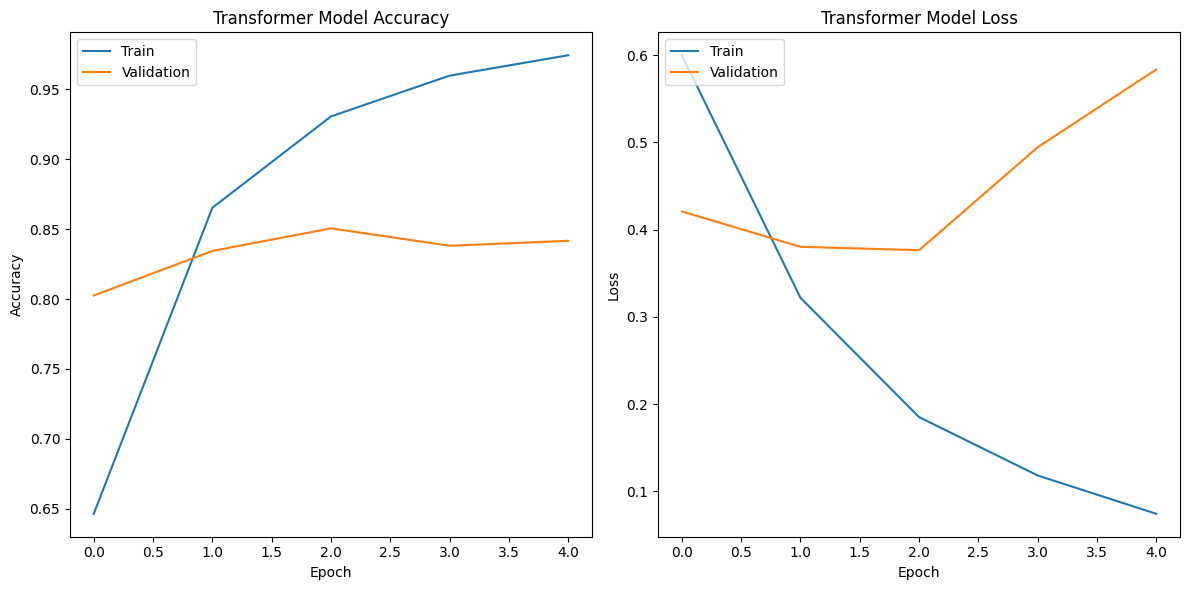

In [42]:
# Visualize training history for the Transformer model

# Create a figure with two subplots side by side
plt.figure(figsize=(12, 6))

# Plot training & validation accuracy values in the first subplot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Transformer Model Accuracy') # Set the title of the subplot
plt.ylabel('Accuracy') # Set the label for the y-axis
plt.xlabel('Epoch') # Set the label for the x-axis
plt.legend(['Train', 'Validation'], loc='upper left') # Add a legend to distinguish between training and validation accuracy

# Plot training & validation loss values in the second subplot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Transformer Model Loss') # Set the title of the subplot
plt.ylabel('Loss') # Set the label for the y-axis
plt.xlabel('Epoch') # Set the label for the x-axis
plt.legend(['Train', 'Validation'], loc='upper left') # Add a legend to distinguish between training and validation loss

# Adjust layout to prevent titles/labels from overlapping
plt.tight_layout()
# Display the plots
plt.show()

### Code Explanation: Train and Evaluate LSTM Model (Bonus)

This cell provides a "bonus" section that builds, trains, and evaluates a Bidirectional LSTM (Long Short-Term Memory) model. This is done to compare its performance with the Transformer model on the same sarcasm detection task. LSTMs are a type of recurrent neural network (RNN) that are also effective for sequential data like text, but they process sequences differently than Transformers.

*   `lstm_model = keras.Sequential([...])`: This line defines the LSTM model using Keras's `Sequential` API, which allows you to build a model layer by layer in a linear stack.
    *   `layers.Embedding(vocab_size, embed_dim, input_length=max_len)`: This is the first layer, similar to the Transformer model. It converts integer word indices into dense embedding vectors. `input_length=max_len` is specified explicitly for the first layer in a Sequential model.
    *   `layers.Bidirectional(layers.LSTM(64))`: This is the core of the LSTM model.
        *   `layers.LSTM(64)`: Creates an LSTM layer with 64 units. LSTM units are designed to handle the vanishing gradient problem and capture long-term dependencies in sequential data.
        *   `layers.Bidirectional(...)`: Wraps the LSTM layer in a `Bidirectional` wrapper. A bidirectional LSTM processes the input sequence in both the forward and backward directions independently and then concatenates their outputs. This allows the model to capture context from both the past and the future in the sequence.
    *   `layers.Dense(64, activation='relu')`: A fully connected dense layer with 64 units and a ReLU activation function.
    *   `layers.Dropout(0.5)`: A dropout layer with a rate of 0.5 for regularization. This randomly sets 50% of the input units to zero during training.
    *   `layers.Dense(1, activation='sigmoid')`: The output layer for binary classification, with a single unit and a sigmoid activation function to output a probability.
*   `lstm_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])`: This line compiles the LSTM model, configuring it for training with the same binary cross-entropy loss, Adam optimizer, and accuracy metric used for the Transformer model.
*   `lstm_model.fit(X_train, y_train, validation_split=0.2, epochs=5, batch_size=64)`: This line trains the LSTM model using the training data (`X_train`, `y_train`) with a 20% validation split, for 5 epochs, and a batch size of 64. The training process and output are similar to the Transformer model's training.
*   `loss_lstm, acc_lstm = lstm_model.evaluate(X_test, y_test)`: This line evaluates the trained LSTM model on the test dataset (`X_test`, `y_test`) to measure its performance on unseen data. It returns the test loss and test accuracy.
*   `print(f"LSTM Test Accuracy: {acc_lstm:.4f}")`: Prints the test accuracy of the LSTM model.
*   The final print statements provide a summary comparison of the test accuracies obtained by the Transformer and LSTM models and explicitly state which model performed better based on this metric. This helps in understanding the relative effectiveness of the two architectures on this specific task.